# Customer Churn Prediction
![image](https://user-images.githubusercontent.com/42872872/158339814-d33fb740-9d1e-4d31-acfa-faccaac69afc.png)\
Churn prediction is identifying customers that are most likely to live a service. This is important for most companies as acquiring new customers is more costlier than retaining old ones, So the results of Churn prediction help companies focus on customers that are likely to churn and develop strategies for retaining those customers.

Here I worked with [E Commerce Customer](https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction).\
The work flow of the project is given below
## Table of Contents
* [Exploratory Data Analysis](#section-one)
* [Data Preprocessing](#section-two)
    - [Missing Value Treatment](#subsection-one)
    - [Categorical Encoding](#subsection-two)
* [Model Development](#section-three)
* [Conclusion](#section-four)

<a id="section-one"></a>
# Exploratory Data Analysis
Here I will explore the dataset, explore each feature of the customers, perform descriptive analysis, and visualize the relationship between the variables.\
The Data is Stored in an Excel file with two excel sheets, one for the data description, and the order contains the customer data.

In [3]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
#from fancyimpute import IterativeImputer
#from skopt import BayesSearchCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
#read the data from the excel file
description = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [5]:
#preview the data
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [6]:
#check the shape of the dataset
print(data.shape)

(5630, 20)


In [8]:
#brief information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

* From the above cells we can see that the data contains records of 5630 customers with 20 features.
* Another thing to note is that there are missing values in some of the columns which will be handled later when building the model.
* Here I will just focus on the exploration of the data, as pandas and matplotlib always skip null values during operation.
* I discovered that the columns with data type of float64, are the continuous varibles, and the rest are discrete

In [7]:
#print summary statistics of the data including the categorical columns
data.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


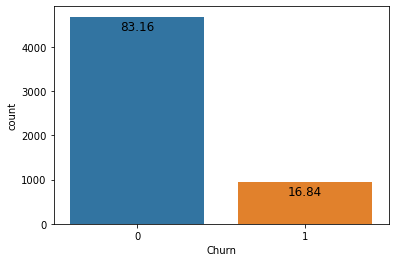

In [10]:
#count the number of customers in the churn and not churn class
ax = sns.countplot(x='Churn', data=data)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

**There are more retained than churned customers, the ratio of retained to churned is approximately 5 to 1, so the churn rate is very low, which is normal therefore making the data imbalanced.**

### Distribution of the Tenure of the customers on the platform

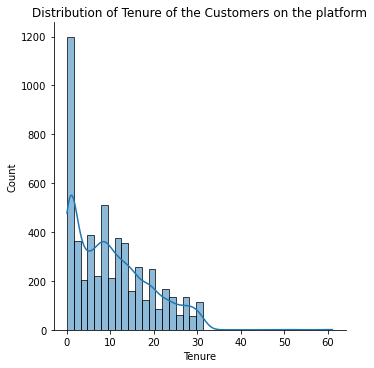

In [11]:
sns.displot(x='Tenure', kde=True, data=data)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

### Distribution of Order Count of customers

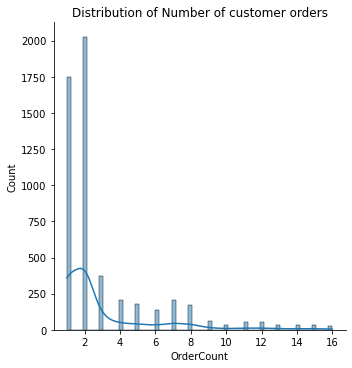

In [12]:
sns.displot(x='OrderCount', kde=True, data=data)
plt.title("Distribution of Number of customer orders")
plt.show()

### Distribution of Recency of the customers
Recency is gotten from the day since last order of each customer. Customers with low number of days since last order are recent customers and vice versa

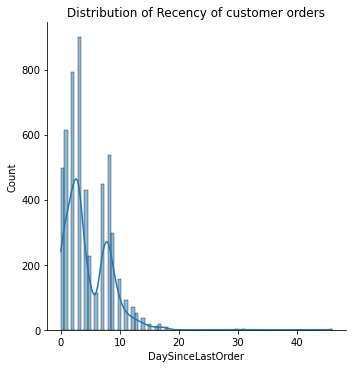

In [13]:
sns.displot(x='DaySinceLastOrder', kde=True, data=data)
plt.title("Distribution of Recency of customer orders")
plt.show()

### Distribution of Amount returned for money spent by customers
Cashback is a reward that refunds a percentage of the money spent to by a customer to him/her, It is usually dependent on the amount spent, so the cashback column can be used in place of the amount spent columns.

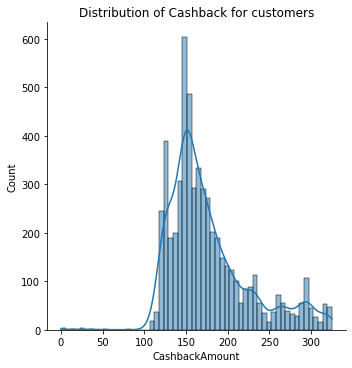

In [14]:
sns.displot(x='CashbackAmount',kde=True, data=data)
plt.title('Distribution of Cashback for customers')
plt.show()

### Distribution of distance of Warehouse to customers home

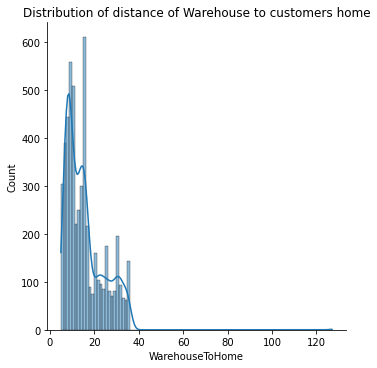

In [15]:
sns.displot(x='WarehouseToHome', kde=True, data=data)
plt.title("Distribution of distance of Warehouse to customers home")
plt.show()

### Distribution of Percentage increase in customer orders

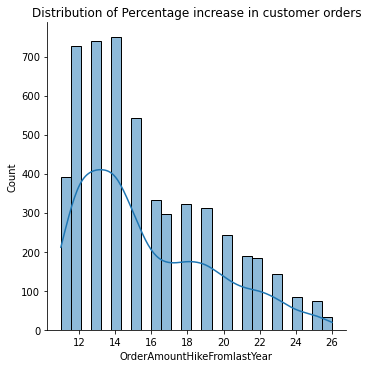

In [16]:
sns.displot(x='OrderAmountHikeFromlastYear', kde=True, data=data)
plt.title("Distribution of Percentage increase in customer orders")
plt.show()

### Distribution of Hours spent on the app by the customers

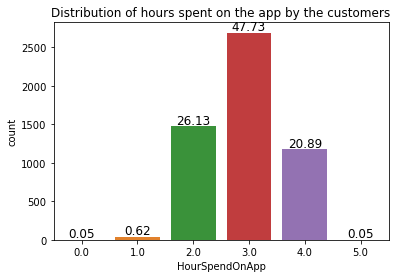

In [17]:
axx = sns.countplot(x='HourSpendOnApp', data=data)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

### Distribution Satisfaction score for churned and retained customers

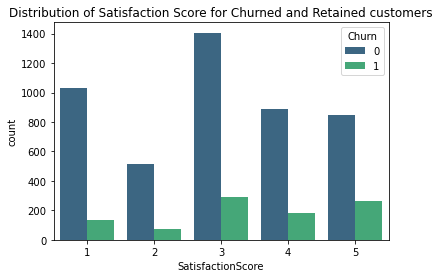

In [19]:
sns.countplot(x='SatisfactionScore', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

### Distribution of Gender for churned and retained customers

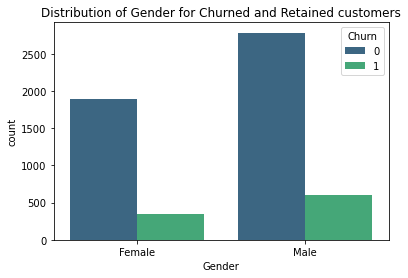

In [20]:
sns.countplot(x='Gender', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Gender for Churned and Retained customers")
plt.show()

### Distribution of marital status for churned and retained customers

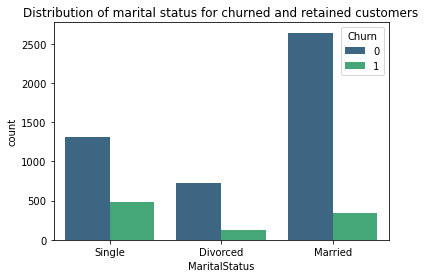

In [21]:
sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of marital status for churned and retained customers")
plt.show()

### Distribution of complain for churned and retained customers

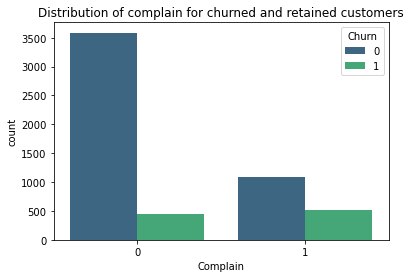

In [22]:
sns.countplot(x='Complain', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of complain for churned and retained customers")
plt.show()

### Relationship between the Tenure and Churn rate

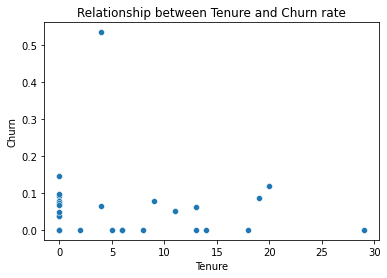

In [23]:
sns.scatterplot(x=data['Tenure'],y=data.groupby('Tenure').Churn.mean())
plt.title("Relationship between Tenure and Churn rate")
plt.show()

### Relationship between the Order Count and Churn rate

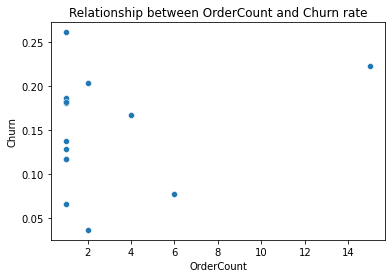

In [24]:
sns.scatterplot(x=data['OrderCount'],y=data.groupby('OrderCount').Churn.mean())
plt.title("Relationship between OrderCount and Churn rate")
plt.show()

### Relationship between the Coupon Used and Churn rate

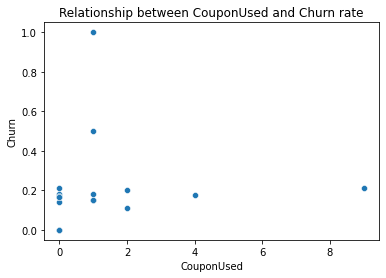

In [25]:
sns.scatterplot(x=data['CouponUsed'],y=data.groupby('CouponUsed').Churn.mean())
plt.title("Relationship between CouponUsed and Churn rate")
plt.show()

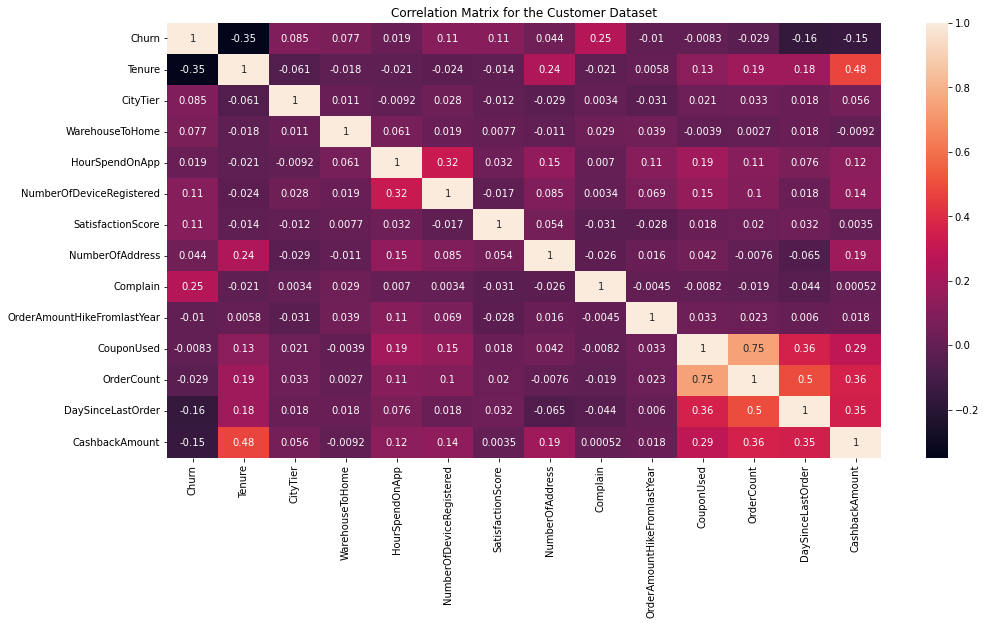

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(data.drop('CustomerID',axis=1).corr(), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

**Findings**
--
From the Analysis;
* **The Tenure, Days since last order, cashback amount, and warehouse to home features have outliers, but the outliers don't have huge impact on tree models, which will be my final model so I will keep them.**
* **Most of the customers spend 3 hours on the app, and 94.75% of the customers spend between 2 and 4 hours on the app**
* **Single people have higher churn rate than other Marital Status**
* **Customers with complain have higher churn rate than customers without complain**
* **From the scatterplot there is a relationship between tenure and the churn rate as there is a churn rate of 0.5 between 4 and 5 Tenure**

<a id="section-two"></a>
# Data Preprocessing
The preprocessing involves encoding categorical variables, imputing missing values, and scaling the data. But those steps will be done in pipelines, and will not be under this section.

<a id="subsection-one"></a>
## Missing Value Treatment
I will use the missingno package to visualize the missing value and understanding the missingness type, which will help in selecting the method for handling the missing values. Although the missing values would not be handled in this section, but the handler would be put in a pipeline in the model development section to avoid data leakage

In [29]:
!pip install missingno

In [30]:
import missingno as msno

In [31]:
#count the number of missing values across each columns
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [32]:
#count the total number of missing values in the dataset
print(f'The number of missing values: {data.isnull().sum().sum()}')
#count the number of rows with missing values
print(f'The number of rows with missing values: {data[data.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856


In total there are 1856 missing values, and there are also 1856 rows with missing values, meaning that each of the missing value is on a different row, and no row has more than one missing value.

So if we drop all the rows with missing values we would be dropping 1856 rows that is 32.97 percent of the dataset and will cause a data loss

In [36]:
#description of data
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Plot the missing values in all columns, using missingness matrix

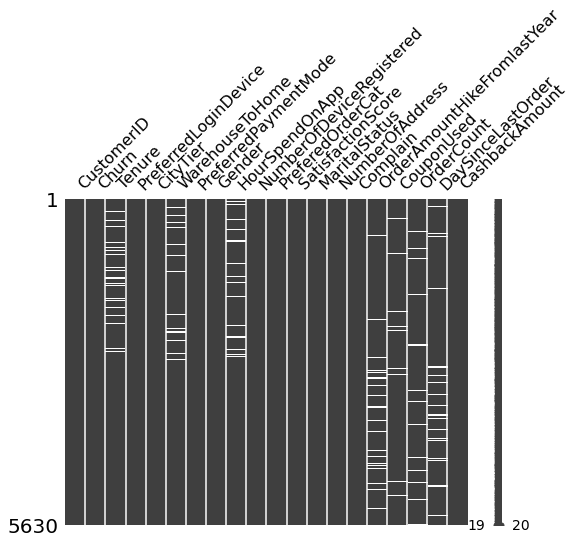

In [37]:
#plot the missingness matrix
msno.matrix(data, figsize=(8,6))
plt.show()

### Identifying missingness type by Identifying relationship between missing values and observed value
Looking at the missingness matrix above the missing values do not follow any pattern, they are **missing completely at random(MCAR)**, I will sort the data to uncover some relationship between missingness type.

After sorting the data by all the columns, I found that sorting by the CashbackAmount columns creates a pattern between the missing values and the CashbackAmount columns, which identifies the missingness as **missing at random(MAR)**

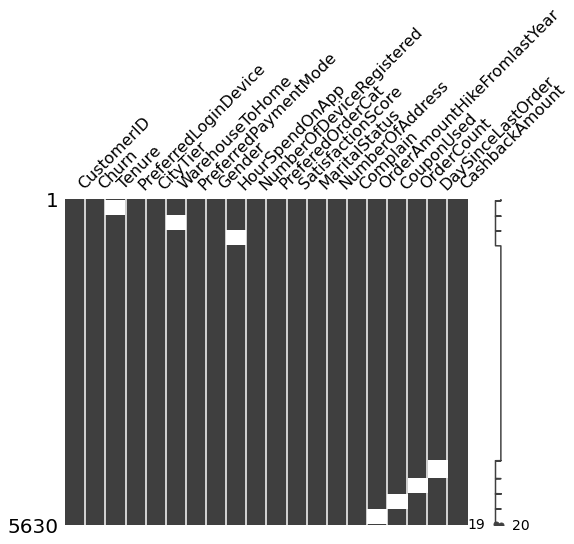

In [38]:
#plot the missingness matrix of sorted data
msno.matrix(data.sort_values(by='CashbackAmount'), figsize=(8,6))
plt.show()

### Identifying relationships between missing values in columns

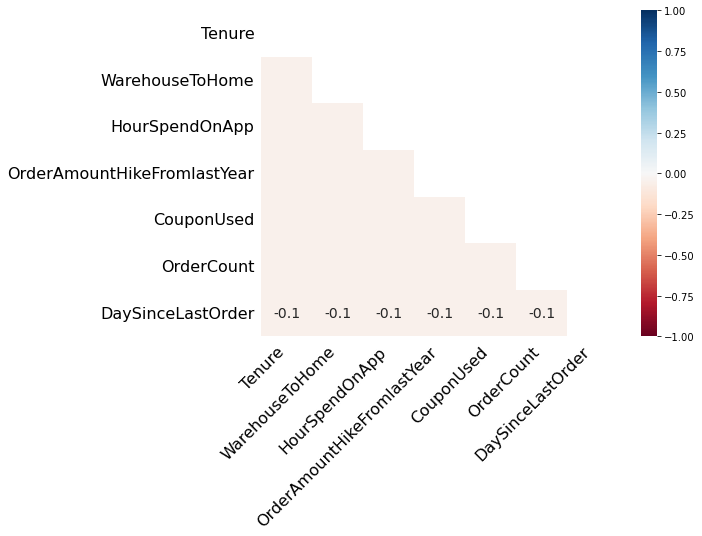

In [39]:
#plot heatmap of missing values
msno.heatmap(data,figsize=(8,6))
plt.show()

### Handling the missing values
Since the missingness is **MAR**, and the missing values are much, I will impute the missing values instead of dropping the missing value rows or columns.

For imputing the missing values, I will use the fancyimpute library, and use the IterativeImputer class to impute the missing values. The imputation will be done in a pipeline in the model selection section

In [45]:
#!pip install fancyimpute

  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=1e20ecd20de40a94beff6bf3fe7e2750769f530871d3c769132d45d41ea15c7e
  Stored in directory: c:\users\91801\appdata\local\pip\cache\wheels\f9\fc\6a\b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=b4575ea96bcae17f385413a2ad3f9dbdb8442e9783a2ac5c0c8b1d585b0c4e01
  Stored in directory: c:\users\91801\appdata\local\pip\cache\wheels\88\c4\be\e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


In [46]:
from fancyimpute import IterativeImputer


<a id="subsection-two"></a>
## Categorical Encoding
Here I will encode the categorical variables as numeric variables, since machine learning algorithms work on numbers and not text. I will use the pandas get_dummies function which applies one-hot encoding to all the variables passed to it.

In [47]:
cat_data = data.select_dtypes(include='object')
cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [48]:
#encode categorical variables and add it to the normal dataset
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([data.drop(cat_data.columns, axis=1), encoded], axis=1)
data_enc.drop('CustomerID', axis=1,inplace=True)

In [49]:
data_enc.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0,0,0,0,1,0,0,0,0,1
1,1,NaN,1,8.0,3.0,4,3,7,1,15.0,...,0,1,1,0,0,1,0,0,0,1
2,1,NaN,1,30.0,2.0,4,3,6,1,14.0,...,0,0,1,0,0,1,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0,0,1,0,1,0,0,0,0,1
4,1,0.0,1,12.0,NaN,3,5,3,0,11.0,...,0,0,1,0,0,1,0,0,0,1


<a id="section-three"></a>
# Model Development
* Firstly I will split the data into training and testing samples.
* I will make pipelines which will include all the preprocessing steps and the classifier.
* I will use **4 Classifiers; 2 linear classifiers, 2 tree classifiers** to build the model.
* I will perform cross validation on the training samples, and use prediction of the testing sample to compare the models, and select the best model for **hyperparameter tuning**.

In [50]:
#selecting features and target variable, and splitting the data
X=data_enc.drop(['Churn'],axis=1)
y=data_enc['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#cross validation
skfcv=StratifiedKFold(n_splits=5)

### Logistic Regression

In [51]:
#Build logistic regression pipeline
log_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('logreg',LogisticRegression())])

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.6316720359392626


Test score for Logistic Regression: 0.6409495548961425
Training score for Logistic Regression: 0.6497305619707466


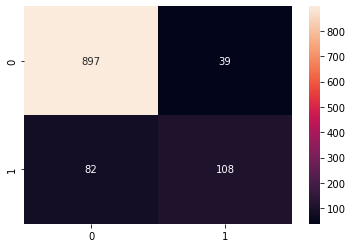

In [52]:
#use logistic regression pipeline to predict test sample
log_pipe.fit(X_train,y_train)
print(f"Test score for Logistic Regression: {f1_score(y_test, log_pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, log_pipe.predict(X_train))}")
log_mat = confusion_matrix(y_test, log_pipe.predict(X_test))
sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

### Linear Discriminant Analysis

In [53]:
#Build LinearDiscriminantAnalysis pipeline
lda_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('lda',LinearDiscriminantAnalysis())])

#cross validate LinearDiscriminantAnalysis model
print(f"Cross validation score for LinearDiscriminantAnalysis: {np.mean(cross_val_score(lda_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for LinearDiscriminantAnalysis: 0.5911106748453845


Test score for LinearDiscriminantAnalysis: 0.6358024691358025
Training score for LinearDiscriminantAnalysis: 0.6093874303898169


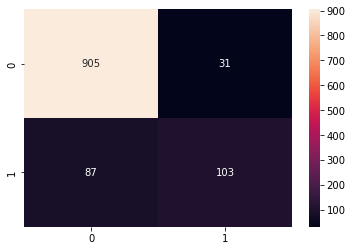

In [54]:
#use LinearDiscriminantAnalysis pipeline to predict test sample
lda_pipe.fit(X_train,y_train)
print(f"Test score for LinearDiscriminantAnalysis: {f1_score(y_test, lda_pipe.predict(X_test))}")
print(f"Training score for LinearDiscriminantAnalysis: {f1_score(y_train, lda_pipe.predict(X_train))}")
lda_mat = confusion_matrix(y_test, lda_pipe.predict(X_test))
sns.heatmap(lda_mat, annot=True,fmt="g")
plt.show()

### Random Forest

In [55]:
#Build Random Forest pipeline
rf_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('rfmodel',RandomForestClassifier())])

#cross validate Random Forest model
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(rf_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Random Forest: 0.8525825675366507


Test score for Random Forest: 0.9130434782608695
Training score for Random Forest: 1.0


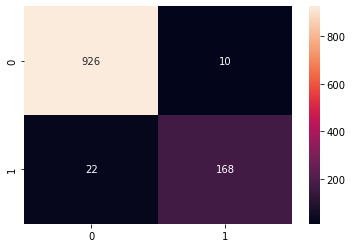

In [57]:
#use Random Forest pipeline to predict test and train sample
rf_pipe.fit(X_train,y_train)
print(f"Test score for Random Forest: {f1_score(y_test, rf_pipe.predict(X_test))}")
print(f"Training score for Random Forest: {f1_score(y_train, rf_pipe.predict(X_train))}")
rf_mat = confusion_matrix(y_test, rf_pipe.predict(X_test))
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

### XGBoost

In [58]:
#Build XGBoost pipeline
xgb_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('xgb',XGBClassifier(verbosity=0,use_label_encoder=False))])

#cross validate XGBoost model
print(f"Cross validation score for XGBoost: {np.mean(cross_val_score(xgb_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for XGBoost: 0.8860940695783341


Test score for XGBoost: 0.9259259259259259
Training score for XGBoost: 1.0


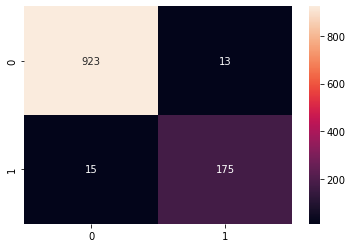

In [59]:
#use XGBoost pipeline to predict test and train sample
xgb_pipe.fit(X_train,y_train)
print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")
xgb_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
sns.heatmap(xgb_mat, annot=True, fmt="g")
plt.show()

## Hyperparameter Tuning
The tree models performed better than the linear models, although we can see that the tree models overtitted as their training f1-score is higher than their testing f1-score.

So I will tune the hyperparameters to reduce overfitting and improve test performance.

I will use BayesSearchCV from the scikit-optimize library for tuning the hyperparameters

In [63]:
#!pip install forge scikit-optimize

  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached platformdirs-2.6.2-py3-none-any.whl (14 kB)
  Using cached tzdata-2022.7-py2.py3-none-any.whl (340 kB)
INFO: pip is looking at multiple versions of forge-tailwind to determine which version is compatible with other requirements. This could take a while.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
INFO: pip is looking at multiple versions of forge-heroku to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of forge-tailwind to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. If you want to abort this run, you can press Ctrl + C to do so. To improve how pip performs, tell us what happened here: https://pip.pypa.io/surveys/backtracking
INFO: pip is looking at multiple versions of forge-db to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of forge-heroku to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might nee

In [64]:
from skopt import BayesSearchCV

In [65]:
#create hyperparameter search space
space={'xgb__eta': (0.01,0.3),
       'xgb__max_depth': (5,11),
      'xgb__subsample': (0.4,1),
      'xgb__n_estimators': (100,250),
      'xgb__gamma':(0,5),
      'xgb__colsample_bytree':(0.4,1),
      'xgb__min_child_weight': (0.3,1)}

In [66]:
#create BayesSearchCV object
search=BayesSearchCV(xgb_pipe,search_spaces=space,n_jobs=-1,cv=skfcv, scoring='f1')

In [67]:
#fit the object to the data
search.fit(X_train, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
              estimator=Pipeline(steps=[('imputer',
                                         IterativeImputer(random_state=0)),
                                        ('scaler', StandardScaler()),
                                        ('xgb',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categori...
                                                       missing=nan,
  

In [68]:
#print the best cv score and the best parameters
print(search.best_score_)
print(search.best_params_)

0.8982735898646625
OrderedDict([('xgb__colsample_bytree', 1.0), ('xgb__eta', 0.10516982593658322), ('xgb__gamma', 0), ('xgb__max_depth', 8), ('xgb__min_child_weight', 0.988355792455885), ('xgb__n_estimators', 250), ('xgb__subsample', 1.0)])


0.9173333333333334


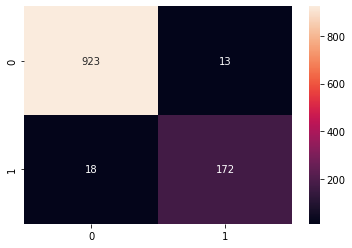

In [71]:
#use the best model parameters to predict the test sample and print the results
best_model=search.best_estimator_
print(f1_score(y_test,best_model.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot=True, fmt="g")
plt.show()

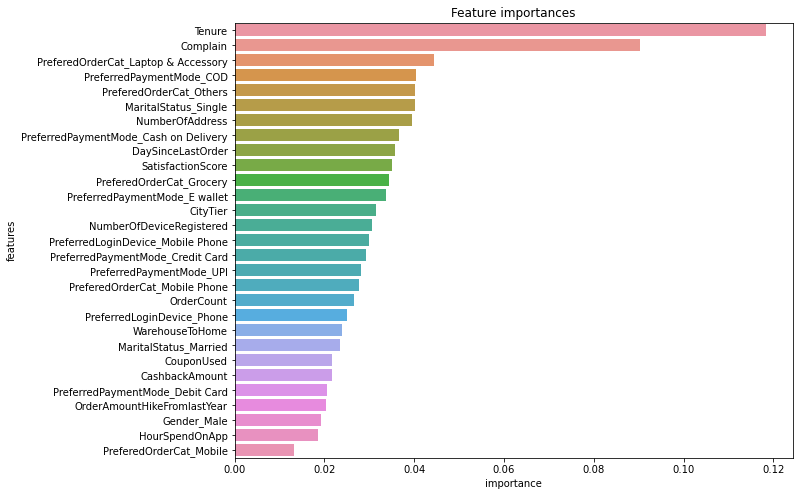

In [72]:
feature_importance=pd.DataFrame(search.best_estimator_[2].feature_importances_, columns=['importance'])
feature_importance['features'] = X_train.columns

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='features', data=feature_importance.sort_values(by='importance', ascending=False))
plt.title('Feature importances')
plt.show()

<a id="section-four"></a>
# Conclusion
After building the 4 models, the tree classifiers performed better than the linear classifiers, with XGBoost performing best with a test f1-score of **91.73%**. I then tuned the xgboost hyperparameters which resulted in a 1.2% increase in cross validation score, and a 1.1% increase in test score.

The **true positive rate is 93.68%** which means we can correctly identify 93% of the customers that will leave.

The **precision is also 93.68%** which means out of the predicted customers that will leave, 93% will actually leave

From the models feature importance the top three features with impact on customer's churn probability are;
* The Tenure of the customer.
* Whether the customer has a complain on the service or not, as expected those with complains have higher churn rate than those without complain.
* The order category of the customers, where those on the mobile category have higher churn rate than other categories.

**These features importances were seen in the visualizations in the EDA section and were documented as findings.**

**Thanks!!!**
Pls Upvote and comment